In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
customer_offers = pd.read_csv('customer_offers.csv')
offer_info = pd.read_csv('offer_info.csv', index_col = 'offer_id')
dict_names = offer_info.to_dict()['varietal']
dict_names = {str(i):dict_names[i] for i in dict_names}
customer_offers = customer_offers.rename(columns = dict_names)
customer_offers.head()

,customer_name,Malbec,Pinot Noir,Espumante,Champagne,Cabernet Sauvignon,Prosecco,Prosecco,Espumante,Chardonnay,...,Chardonnay,Pinot Noir,Cabernet Sauvignon,Pinot Noir,Champagne,Cabernet Sauvignon,Pinot Grigio,Malbec,Champagne,Cabernet Sauvignon
0,Adams,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
1,Allen,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,Anderson,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
3,Bailey,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,Baker,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
from sklearn import model_selection
X_train, X_test = model_selection.train_test_split(customer_offers[customer_offers.columns[1:]], random_state = 100)
print('Length of training set: ' + str(len(X_train)))
print('Length of test set: ' + str(len(X_test)))
print('Length of all set: ' + str(len(customer_offers)))

Length of training set: 75
Length of test set: 25
Length of all set: 100


Text(0, 0.5, 'Average Silhouette Score')

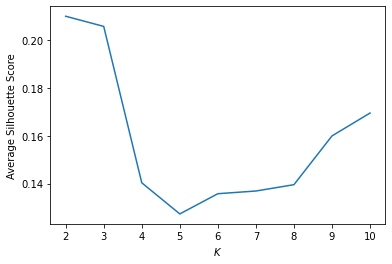

In [ ]:
from sklearn import cluster
from sklearn import metrics
import matplotlib.pyplot as plt
krange = list(range(2,11))
avg_silhouettes = []
for n in krange:
    model = cluster.KMeans(n_clusters=n, random_state=10)
    cluster_assignments = model.fit_predict(X_train)
    silhouette_avg = metrics.silhouette_score(X_train, cluster_assignments)
    avg_silhouettes.append(silhouette_avg)
plt.plot(krange, avg_silhouettes)
plt.xlabel("$K$")
plt.ylabel("Average Silhouette Score")

In [ ]:
model = cluster.KMeans(n_clusters=2,random_state=10)
model.fit_predict(X_train)
km_silhouette = metrics.silhouette_score(X_train, model.labels_)
print('k-means silhouette score: ' + str(km_silhouette))

k-means silhouette score: 0.21012774594457168


In [ ]:
model = cluster.KMeans(n_clusters=3,random_state=10)
model.fit_predict(X_train)
km_silhouette = metrics.silhouette_score(X_train, model.labels_)
print('k-means silhouette score: ' + str(km_silhouette))

k-means silhouette score: 0.2058702731554966


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=ff5e2091-543c-4b2c-9a56-1e41bbaff775' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>